Template for Assignment 1



In [20]:
import numpy as np # Is it version 2.1 the one you are running?
import matplotlib.pyplot as plt
import torch # Is it version 2.4 the one you are running?
import torch.nn as nn
import torch.optim as optim

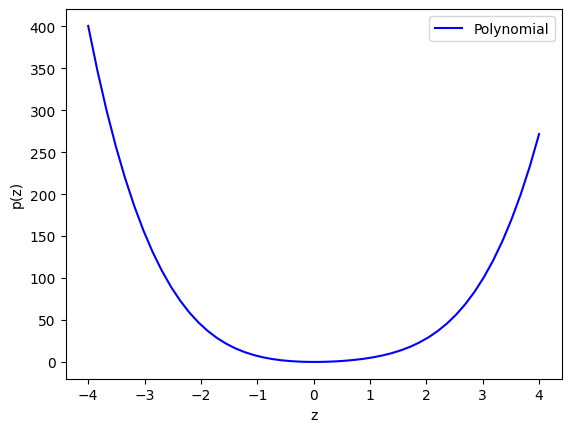

In [35]:
def plot_polynomial(coeffs, z_range, color='b'):
    z_min, z_max = z_range
    z = np.linspace(z_min, z_max) # 1000 punti tra z_min e z_max

    # Calcola i valori del polinomio
    y = np.polyval(coeffs, z)  # Invertiamo l'ordine dei coefficienti per np.polyval

    # Crea il grafico
    plt.plot(z, y, color=color, label='Polynomial')

    # Aggiungi dettagli al grafico
    #plt.title('Grafico del Polinomio')
    plt.legend()
    plt.xlabel('z')
    plt.ylabel('p(z)')

    # Mostra il grafico
    plt.show()

coeffs = np.array([1, -1, 5, -0.1, 1/30])  # [w_0, w_1, w_2, w_3, w_4]
plot_polynomial(coeffs, (-4, 4))

In [15]:
def create_dataset(coeffs, z_range, sample_size, sigma, seed=42):
    # Set the random state in numpy
    torch.manual_seed(seed)
    # Unpack the values in z_range
    z_min, z_max = z_range
    # Sample sample_size points from a uniform distribution
    z = torch.rand(sample_size)
    # Rescale between z_min and z_max
    z = z * (z_max - z_min) + z_min
    # Create matrix X
    X = torch.stack([torch.ones(sample_size), z, z**2, z**3, z**4], dim=1)
    # Compute hat(y)
    y_hat = sum(coeff * z**i for i, coeff in enumerate(coeffs))
    # Compute y (Add Gaussian noise)
    y = y_hat + torch.normal(torch.zeros(sample_size), sigma*torch.ones(sample_size))

    return X, y

sigma = 0.5
train_sample_size = 500
train_seed = 0
val_sample_size = 500
val_seed = 1
z_range = (-2,2)

coeffs = [1, -1, 5, -0.1, 1/30]  # [w_0, w_1, w_2, w_3, w_4]

X_train, y_train = create_dataset(coeffs, z_range, train_sample_size, sigma, train_seed)
X_val, y_val = create_dataset(coeffs, z_range, val_sample_size, sigma, val_seed)

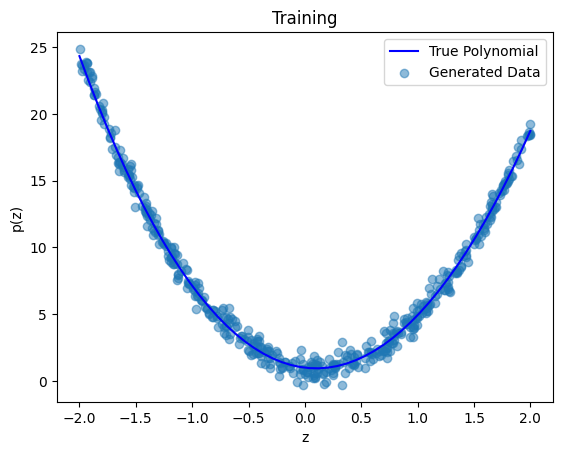

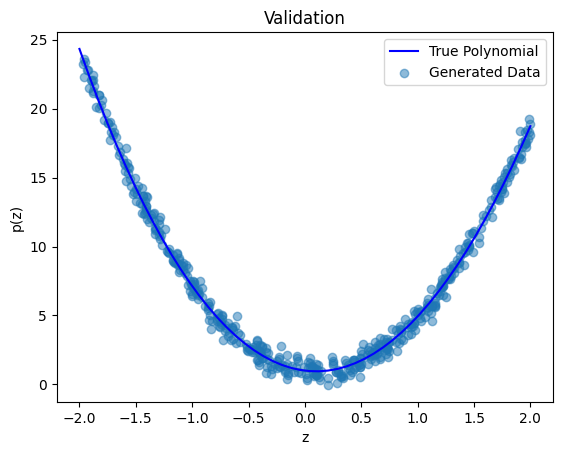

In [36]:
def visualize_data(X, y, coeffs, z_range, title):
    z_min, z_max = z_range
    z = np.linspace(z_min, z_max)

    # Compute the true polynomial and shows it
    y_true = np.polyval(coeffs[::-1], z)
    plt.plot(z, y_true, color='b', label='True Polynomial')

    # Scatter plot
    plt.scatter(X[:, 1], y, alpha=0.5, label='Generated Data')

    plt.title(title)
    plt.xlabel('z')
    plt.ylabel('p(z)')
    plt.legend()
    plt.show()

visualize_data(X_train, y_train, coeffs, z_range, "Training")
visualize_data(X_val, y_val, coeffs, z_range, "Validation")

In [ ]:
if __name__ == "__main__":
    '''
    Code for Q1
    '''
    assert np.version.version=="2.1"


    '''
    Code for Q2
    '''
    # Please continue organizing your script this way.

